### Step 1: Data Acquisition

#### Import required libraries and read the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# splitting, scaling, and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# evaluation metrics
from sklearn import metrics
from sklearn.metrics import recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

# Package for handling imbalance data
#!pip install imblear
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline and transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To view all the columns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/bank_loan_defaulter.csv')

#### Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
df.shape

(67463, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

- The dataset has 67,463 rows, 35 columns(features) and none of the rows have null values.
- The dataset has more numeric features than categorical.

### Step 2: Apply EDA (Exploratory Data Analysis)

#### Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods

In [ ]:
df.duplicated().any()

False

In [ ]:
df.isnull().sum()/len(df)*100

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

- There are no duplicate records or missing values.

#### Check summary statistics of the dataset, and write your key observations.

In [ ]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


- The minimum applied loan is 1,014 dollars and maximum is 35,000(approx.) dollars which infers a wide range of the loan amount.
- The mean interest rate is 11% and maximum is 27%.

In [ ]:
df.describe(include='O')

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


#### Drop the columns which you think redundant for the analysis.

In [ ]:
df.drop(['ID', 'Batch Enrolled', 'Grade', 'Sub Grade', 'Loan Title', 'Payment Plan'],axis=1, inplace=True)

In [ ]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,MORTGAGE,176346.62670,Not Verified,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,RENT,39833.92100,Source Verified,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,MORTGAGE,91506.69105,Source Verified,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,MORTGAGE,108286.57590,Source Verified,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,MORTGAGE,44234.82545,Source Verified,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


#### Perform necessary univariate and multivariate analysis.

In [ ]:
list(df.select_dtypes(include=['object']).columns)

['Employment Duration',
 'Verification Status',
 'Initial List Status',
 'Application Type']

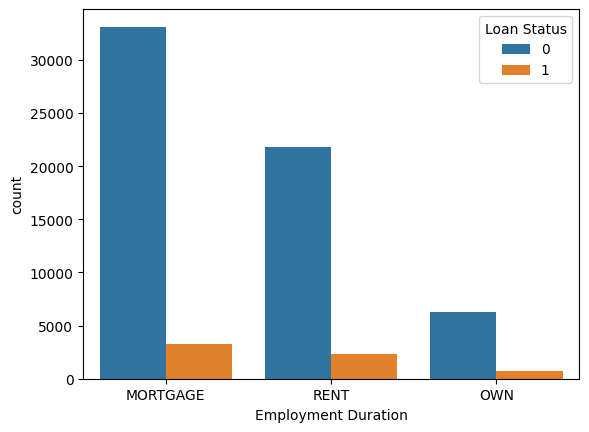

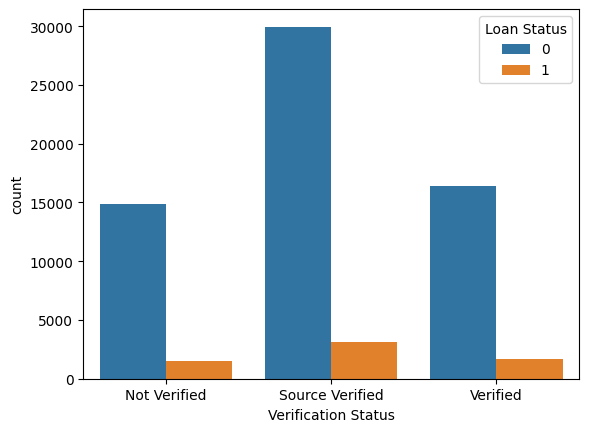

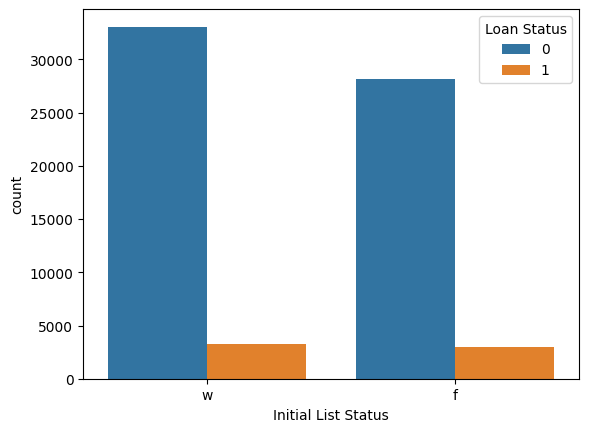

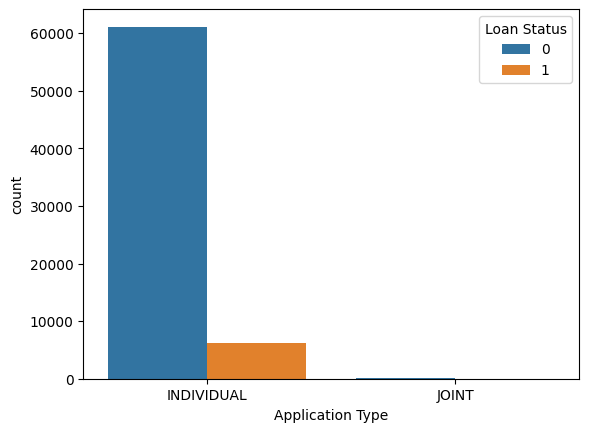

In [ ]:
list_cols = list(df.select_dtypes(include=['object']).columns)
for col in list_cols:
    ax= sns.countplot(x=df[col], hue= df['Loan Status'])
    plt.show()

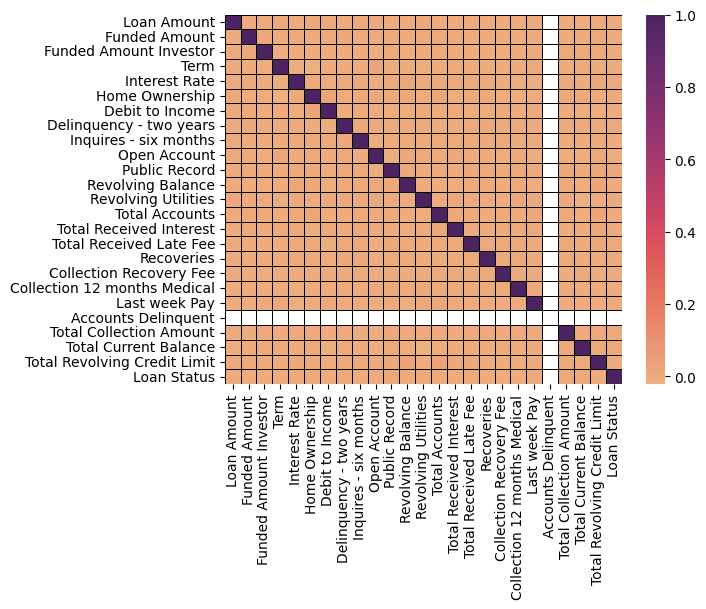

In [ ]:
sns.heatmap(df.corr(),cmap='flare', linecolor='black', linewidths=0.5)
plt.show()

- There seems to be negligible correlation between the features.

#### Check the distribution of the target column 'Loan Status', and comment on the class distribution.

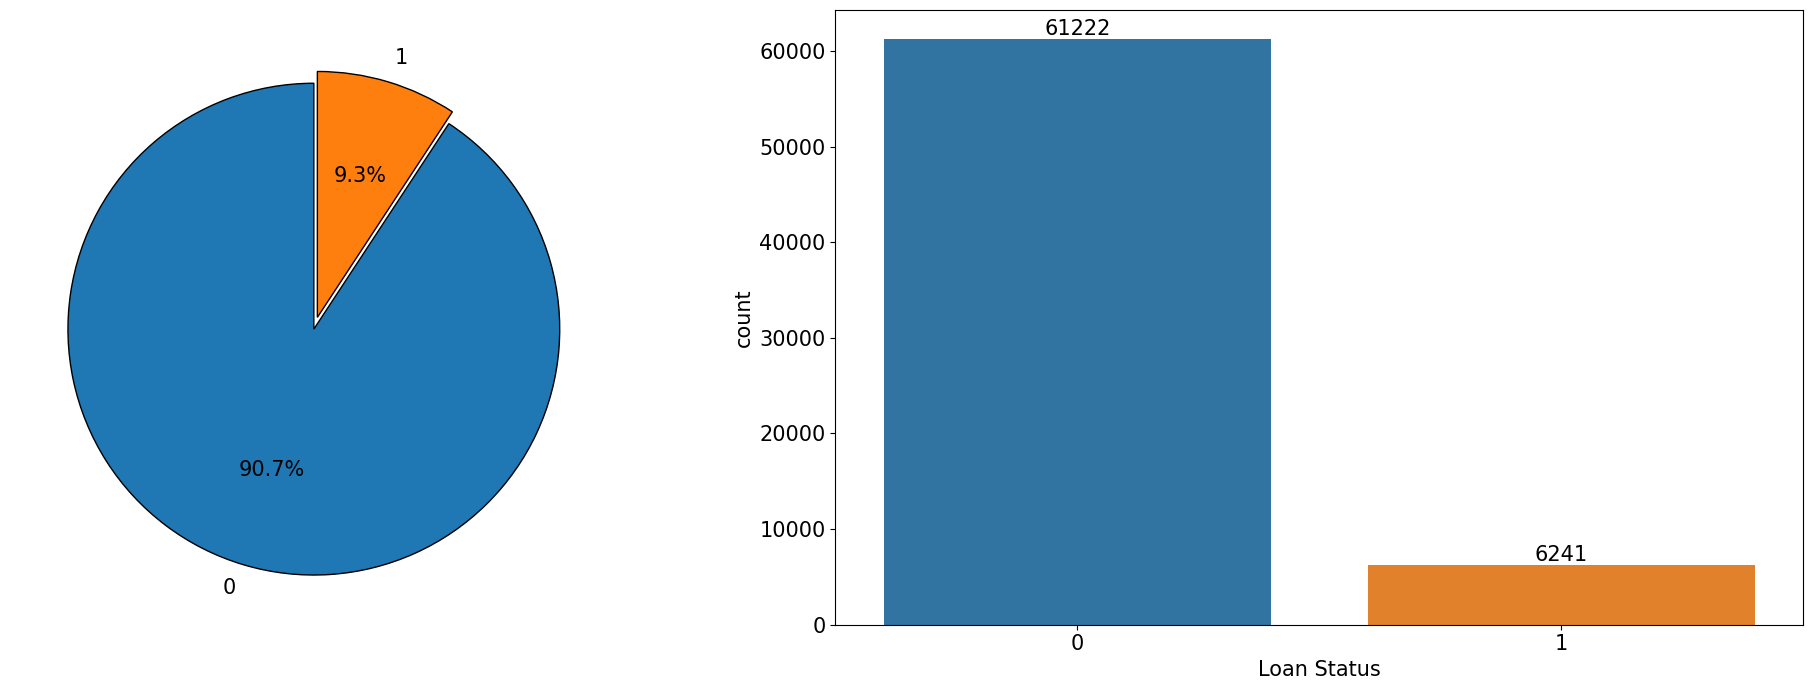

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
ax1.pie(df['Loan Status'].value_counts().values, labels = df['Loan Status'].value_counts().index, startangle= 90, explode = [0.05,0] , autopct='%1.1f%%', textprops ={'fontsize': 15}, wedgeprops={'edgecolor':'black'})

ax =sns.countplot(ax=ax2, x = df['Loan Status'])
ax.set_xlabel('Loan Status', fontsize=15)
ax.set_ylabel('count', fontsize=15)
for label in ax.containers:
    ax.bar_label(label, fontsize = 15, color = 'black')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.tight_layout()

- The feature 'Loan Status' is highly imbalanced.

### Step 3: Data preparation for model building.

#### Segregate the target and independent features.

In [ ]:
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

#### Encode the categorical data.

In [ ]:
l1 = list(df.select_dtypes(include=['object']).columns)
for x in l1:
    print(x,df[x].nunique(),list(df[x].unique()))

Employment Duration 3 ['MORTGAGE', 'RENT', 'OWN']
Verification Status 3 ['Not Verified', 'Source Verified', 'Verified']
Initial List Status 2 ['w', 'f']
Application Type 2 ['INDIVIDUAL', 'JOINT']


- Since there are more than 2 categories in categorical columns it is better if we use one-hot encoding

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Source Verified,Verification Status_Verified,Initial List Status_w,Application Type_JOINT
0,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0,0,0,0,1,0
1,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0,1,1,0,0,0
2,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0,0,1,0,1,0
3,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0,0,1,0,1,0
4,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0,0,1,0,1,0


#### Handle the imbalanced data using oversampling or under sampling approach, and check the distribution of the re-sampled target class

In [ ]:
# using Oversampling approach for imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.65)
X_res,y_res = smote.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((101016, 30), (101016,))

In [ ]:
## Checking the distribution of the resampled target class
pd.DataFrame(y_res).value_counts(normalize=True)*100

Loan Status
0              60.606241
1              39.393759
dtype: float64

#### Split the data into train and test

In [ ]:
## Splitting the balanced data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(70711, 30) (30305, 30)
(70711,) (30305,)


#### Select the K best features using wrapper or embedded methods

In [ ]:
selector = SelectFromModel(estimator=RandomForestClassifier()).fit(X_res, y_res)

In [ ]:
selector.get_support()

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [ ]:
selected_features = X_res.columns[(selector.get_support())]
print(selected_features)
print('\n')
print('number of features selected out of 30 features:',len(selected_features))

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Revolving Balance', 'Revolving Utilities', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Last week Pay', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Employment Duration_RENT',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Initial List Status_w'],
      dtype='object')


number of features selected out of 30 features: 20


### Step 4: Model Building and evaluation.

#### Build a base model using the Original Imbalanced data.

In [ ]:
## Splitting dataset into train and test

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train_base.shape,X_test_base.shape)
print(y_train_base.shape,y_test_base.shape)

(47224, 30) (20239, 30)
(47224,) (20239,)


In [ ]:
## Building a simple random forest classifier as a base model using original data.
rf = RandomForestClassifier()
rf.fit(X_train_base,y_train_base)

## Prediction on original test data
og_prediction = rf.predict(X_test_base)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))

Accuracy: 0.9084440930876031
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     20239
           1       0.00      0.00      0.00         0

    accuracy                           0.91     20239
   macro avg       0.50      0.45      0.48     20239
weighted avg       1.00      0.91      0.95     20239



- Our goal is to predict whether a customer will be defaulter or not on an imbalanced dataset so accuracy, though very good, is not a suitable metric to consider here.
- The precision, recall and f1-score is great for the majority class(non-defaulters) and 0 for minority class which is not desirable.

#### Try multiple models and tune their hyperparameters with appropriate methods and report the best performing model(use balanced data)

In [ ]:
### Parameters to tune.
param_rf = [{'n_estimators':[100, 200, 500, 1000],
            'max_depth':[7,9, 13,15,19,23,25]}]

In [ ]:
## instantiate randomforest classifier
rf = RandomForestClassifier()

## define the tuning model GridsearchCV, and pass estimator and parameters to tune.
tuning = GridSearchCV(rf,param_rf,cv=3,n_jobs=-1,verbose=1)

In [ ]:
## Fit the tuning model on the selected features
tuning.fit(X_res[selected_features],y_res)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [7, 9, 13, 15, 19, 23, 25],
                          'n_estimators': [100, 200, 500, 1000]}],
             verbose=1)

In [ ]:
tuning.best_params_ # The best combination of the hyperparameters based on the best K features for RandomForestClassifier.

{'max_depth': 25, 'n_estimators': 500}

### Step 5: Pipeline

#### Build a pipeline and put all the above steps in the pipeline and fit the pipeline on train data and get predictions on the test data.

In [ ]:
# Instantiate the transformer and classifier
scaler = StandardScaler()
feature_selection = SelectFromModel(RandomForestClassifier(n_estimators=500, max_depth=25))
classifier = RandomForestClassifier(n_estimators=500, max_depth=25)

# Build the pipeline
pipeline = Pipeline([
    ('ss', scaler),  # Scaling the data
    ('feature_selection', feature_selection),  # Selecting the best K features
    ('classifier', classifier)  # Random Forest classifier
])

# Fit the pipeline on the train data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('ss', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=25,
                                                                  n_estimators=500))),
                ('classifier',
                 RandomForestClassifier(max_depth=25, n_estimators=500))])

In [ ]:
## Prediction on test data
prediction = pipeline.predict(X_test)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction,y_test))

Accuracy: 0.8363966342187757
Recall: 0.8270362635276248
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     19771
           1       0.74      0.83      0.78     10534

    accuracy                           0.84     30305
   macro avg       0.82      0.83      0.82     30305
weighted avg       0.84      0.84      0.84     30305



### Step 06: Conclusions

In [ ]:
print('\033[1;46;13m Base model results:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))
print('--'*50)
print('\033[1;46;13m Tuned model results:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction,y_test))

 Base model results:
Accuracy: 0.9084440930876031
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     20239
           1       0.00      0.00      0.00         0

    accuracy                           0.91     20239
   macro avg       0.50      0.45      0.48     20239
weighted avg       1.00      0.91      0.95     20239

----------------------------------------------------------------------------------------------------
 Tuned model results:
Accuracy: 0.8363966342187757
Recall: 0.8270362635276248
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     19771
           1       0.74      0.83      0.78     10534

    accuracy                           0.84     30305
   macro avg       0.82      0.83      0.82     30305
weighted avg       0.84      0.84      0.84     30305



#### Comparison:

- The use of the oversampling technique to address class imbalance has significantly improved the performance metrics for the minority class, including recall, precision, and F1-score.

#### Steps taken:
1. To address the initial class imbalance, we applied an oversampling approach, enhancing the model’s ability to predict the minority class accurately.
2. Feature selection was performed using feature importance techniques, reducing the original set of 30 features to the 20 most relevant ones.
3. We trained a Random Forest Classifier model, tuning its hyperparameters using GridSearchCV on the selected features to optimize performance.
4. A machine learning pipeline was built on the training data, which first scales the features, selects the top K features, and finally fits the Random Forest Classifier model with the optimized hyperparameters.